### Experiments exploration

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter,
                           MultiprocessingEvaluator, Policy, Scenario)

from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

from ema_workbench import (Model, )

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time

from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(5)

In [2]:
uncertainties = dike_model.uncertainties
levers = dike_model.levers 

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)

In [3]:
base_case = Policy('Base Case', **{l.name:0 for l in dike_model.levers})

In [4]:
base_case

Policy({'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0})

In [20]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=100)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 100 policies * 1 model(s) = 100000 experiments
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] 30000 cases completed
[MainProcess/INFO] 40000 cases completed
[MainProcess/INFO] 50000 cases completed
[MainProcess/INFO] 60000 cases completed
[MainProcess/INFO] 70000 cases completed
[MainProcess/INFO] 80000 cases completed
[MainProcess/INFO] 90000 cases completed
[MainProcess/INFO] 100000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [21]:
experiments.head()

A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                    126.0  223.622426         1   0.871722  218.831042   
1                     79.0  298.108524         1   0.100861  232.253542   
2                     80.0  275.541284        10   0.200497  229.990714   
3                     15.0  200.546816         1   0.000321  281.785818   
4                    120.0  312.688358       1.5   0.202780  334.804942   

  A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  \
0         1   0.705490  237.027027        10   0.852197  ...   
1         1   0.104278   33.997448       1.5   0.316080  ...   
2       1.5   0.055838  114.045936       1.5   0.031793  ...   
3         1   0.018157  162.548088         1   0.153352  ...   
4       1.5   0.047327  178.394116       1.5   0.513973  ...   

   A.4_DikeIncrease 0 A.4_DikeIncrease 1  A.4_DikeIncrease 2  \
0                 5.0                0.0                 5.0   
1                 5.0                0.0                 5.0   
2                 5.0                0.0                 5.0   
3                 5.0                0.0                 5.0   
4                 5.0                0.0                 5.0   

   A.5_DikeIncrease 0 A.5_DikeIncrease 1  A.5_DikeIncrease 2 EWS_DaysToThreat  \
0                 4.0                8.0                 3.0              1.0   
1                 4.0                8.0                 3.0              1.0   
2                 4.0                8.0                 3.0              1.0   
3                 4.0                8.0                 3.0              1.0   
4                 4.0                8.0                 3.0              1.0   

  scenario policy     model  
0        0      0  dikesnet  
1        1      0  dikesnet  
2        2      0  dikesnet  
3        3      0  dikesnet  
4        4      0  dikesnet  

[5 rows x 53 columns]

In [22]:
from ema_workbench.analysis import plotting, plotting_util

evac = outcomes['Expected Evacuation Costs 2']
maxEvac = evac

fig, ax = plt.subplots(figsize=(6,6))

sc = ax.scatter(experiments['A.1_Bmax'], experiments['A.1_pfail'], c=maxEvac)
plt.colorbar(sc)
ax.set_xlabel('A.1_Bmax')
ax.set_ylabel('A.1_pfail')
plt.show()

In [23]:
experiments.to_csv('Experiments_from_Exploration_1000scenarios_100Policies_pf5.csv')

In [25]:
len(experiments)

100000

In [34]:
outcomes_DF = pd.DataFrame(outcomes)
outcomes_DF.to_csv('Outcomes_from_Exploration_1000scenarios_100Policies_pf5.csv')

In [28]:
outcomes_load_DF = pd.read_csv('./outcomes/Outcomes_from_Exploration_1000scenarios_100Policies_pf5.csv')
experiments_load_DF = pd.read_csv('./outcomes/Experiments_from_Exploration_1000scenarios_100Policies_pf5.csv')
#adjust to the ones needed
outcomes_of_interest = outcomes_load_DF.iloc[:,::]

In [29]:
pd.set_option('display.max_columns', None)
outcomes_of_interest.head()

Unnamed: 0  A.1_Expected Annual Damage 0  A.1_Dike Investment Costs 0  \
0           0                           0.0                 6.071731e+07   
1           1                           0.0                 6.071731e+07   
2           2                           0.0                 6.071731e+07   
3           3                           0.0                 6.071731e+07   
4           4                           0.0                 6.071731e+07   

   A.1_Expected Number of Deaths 0  A.2_Expected Annual Damage 0  \
0                              0.0                           0.0   
1                              0.0                           0.0   
2                              0.0                           0.0   
3                              0.0                           0.0   
4                              0.0                           0.0   

   A.2_Dike Investment Costs 0  A.2_Expected Number of Deaths 0  \
0                 9.952540e+07                              0.0   
1                 9.952540e+07                              0.0   
2                 9.952540e+07                              0.0   
3                 9.952540e+07                              0.0   
4                 9.952540e+07                              0.0   

   A.3_Expected Annual Damage 0  A.3_Dike Investment Costs 0  \
0                  0.000000e+00                 2.419803e+07   
1                  3.036115e+06                 2.419803e+07   
2                  1.740958e+08                 2.419803e+07   
3                  2.703954e+07                 2.419803e+07   
4                  0.000000e+00                 2.419803e+07   

   A.3_Expected Number of Deaths 0  A.4_Expected Annual Damage 0  \
0                         0.000000                           0.0   
1                         0.001489                           0.0   
2                         0.128044                           0.0   
3                         0.013140                           0.0   
4                         0.000000                           0.0   

   A.4_Dike Investment Costs 0  A.4_Expected Number of Deaths 0  \
0                 1.106877e+07                              0.0   
1                 1.106877e+07                              0.0   
2                 1.106877e+07                              0.0   
3                 1.106877e+07                              0.0   
4                 1.106877e+07                              0.0   

   A.5_Expected Annual Damage 0  A.5_Dike Investment Costs 0  \
0                  1.018132e+06                 3.337712e+07   
1                  0.000000e+00                 3.337712e+07   
2                  0.000000e+00                 3.337712e+07   
3                  0.000000e+00                 3.337712e+07   
4                  0.000000e+00                 3.337712e+07   

   A.5_Expected Number of Deaths 0  RfR Total Costs 0  \
0                         0.000253        340700000.0   
1                         0.000000        340700000.0   
2                         0.000000        340700000.0   
3                         0.000000        340700000.0   
4                         0.000000        340700000.0   

   Expected Evacuation Costs 0  A.1_Expected Annual Damage 1  \
0                    23.209601                           0.0   
1                    48.414519                           0.0   
2                  5057.037941                           0.0   
3                   435.421645                           0.0   
4                     0.000000                           0.0   

   A.1_Dike Investment Costs 1  A.1_Expected Number of Deaths 1  \
0                 7.427904e+07                              0.0   
1                 7.427904e+07                              0.0   
2                 7.427904e+07                              0.0   
3                 7.427904e+07                              0.0   
4                 7.427904e+07                              0.0   

   A.2_Expected Annua

In [30]:
for n in range(1,6):
    outcomes_of_interest[f'A.{n}_Expected Total Damage'] = 0
    outcomes_of_interest[f'A.{n}_Total Dike Investment Costs'] = 0
    outcomes_of_interest[f'A.{n}_Total Expected Number of Deaths'] = 0
    
    for i in range(3):
        outcomes_of_interest[f'A.{n}_Expected Total Damage'] += outcomes_of_interest[f'A.{n}_Expected Annual Damage {i}']
        outcomes_of_interest[f'A.{n}_Total Dike Investment Costs'] += outcomes_of_interest[f'A.{n}_Dike Investment Costs {i}']
        outcomes_of_interest[f'A.{n}_Total Expected Number of Deaths'] += outcomes_of_interest[f'A.{n}_Expected Number of Deaths {i}']
    n+=1

outcomes_of_interest['RfR Total Costs'] = 0
outcomes_of_interest['Total Expected Evacuation Costs'] = 0
outcomes_of_interest['Other Areas Total Number of Deaths'] = 0  
outcomes_of_interest['Other Areas Total Dike Investment Costs'] = 0
outcomes_of_interest['Other Areas Total Damage'] = 0


for i in range(3):
    outcomes_of_interest['RfR Total Costs'] += outcomes_of_interest[f'RfR Total Costs {i}']
    outcomes_of_interest['Total Expected Evacuation Costs'] += outcomes_of_interest[f'Expected Evacuation Costs {i}']
    
for area in range(1,5):
    outcomes_of_interest['Other Areas Total Number of Deaths'] += outcomes_of_interest[f'A.{area}_Total Expected Number of Deaths']
    outcomes_of_interest['Other Areas Total Dike Investment Costs'] += outcomes_of_interest[f'A.{area}_Total Dike Investment Costs']
    outcomes_of_interest['Other Areas Total Damage'] += outcomes_of_interest[f'A.{area}_Expected Total Damage']
    
outcomes_totals = outcomes_of_interest.iloc[:,-20::]

In [31]:
outcomes_totals.head()

A.1_Expected Total Damage  A.1_Total Dike Investment Costs  \
0                        0.0                     2.369736e+08   
1                        0.0                     2.369736e+08   
2                        0.0                     2.369736e+08   
3                        0.0                     2.369736e+08   
4                        0.0                     2.369736e+08   

   A.1_Total Expected Number of Deaths  A.2_Expected Total Damage  \
0                                  0.0                        0.0   
1                                  0.0                        0.0   
2                                  0.0                        0.0   
3                                  0.0                        0.0   
4                                  0.0                        0.0   

   A.2_Total Dike Investment Costs  A.2_Total Expected Number of Deaths  \
0                     1.741921e+08                                  0.0   
1                     1.741921e+08                                  0.0   
2                     1.741921e+08                                  0.0   
3                     1.741921e+08                                  0.0   
4                     1.741921e+08                                  0.0   

   A.3_Expected Total Damage  A.3_Total Dike Investment Costs  \
0               0.000000e+00                     1.242050e+08   
1               3.036115e+06                     1.242050e+08   
2               1.740958e+08                     1.242050e+08   
3               2.703954e+07                     1.242050e+08   
4               0.000000e+00                     1.242050e+08   

   A.3_Total Expected Number of Deaths  A.4_Expected Total Damage  \
0                             0.000000                        0.0   
1                             0.001489                        0.0   
2                             0.128044                        0.0   
3                             0.013140                        0.0   
4                             0.000000                        0.0   

   A.4_Total Dike Investment Costs  A.4_Total Expected Number of Deaths  \
0                     2.416243e+07                                  0.0   
1                     2.416243e+07                                  0.0   
2                     2.416243e+07                                  0.0   
3                     2.416243e+07                                  0.0   
4                     2.416243e+07                                  0.0   

   A.5_Expected Total Damage  A.5_Total Dike Investment Costs  \
0               1.018132e+06                     1.342366e+08   
1               0.000000e+00                     1.342366e+08   
2               0.000000e+00                     1.342366e+08   
3               0.000000e+00                     1.342366e+08   
4               0.000000e+00                     1.342366e+08   

   A.5_Total Expected Number of Deaths  RfR Total Costs  \
0                             0.000253     1.397700e+09   
1                             0.000000     1.397700e+09   
2                             0.000000     1.397700e+09   
3                             0.000000     1.397700e+09   
4                             0.000000     1.397700e+09   

   Total Expected Evacuation Costs  Other Areas Total Number of Deaths  \
0                        23.209601                            0.000000   
1                        48.414519                            0.001489   
2                      5057.037941                            0.128044   
3                       435.421645                            0.013140   
4                         0.000000                            0.000000   

   Other Areas Total Dike Investment Costs  Other Areas Total Damage  
0                             5.595331e+08              0.000000e+00  
1                             5.595331e+08              3.036115e+06  
2                             5.595331e+08              1.740958e+08  
3             

In [32]:
outcomes_totals.to_csv('Outcomes_totals_from_Exploration_1000scenarios_100Policies_pf5.csv')

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

pair_plot = sns.pairplot(outcomes_totals, vars=list(outcomes_totals.keys()))

In [53]:
pair_plot.savefig('pairplot.png')

In [33]:
from ema_workbench.analysis import feature_scoring

x = experiments_load_DF
y = outcomes_totals

fs = feature_scoring.get_feature_scores_all(x, y)

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a si

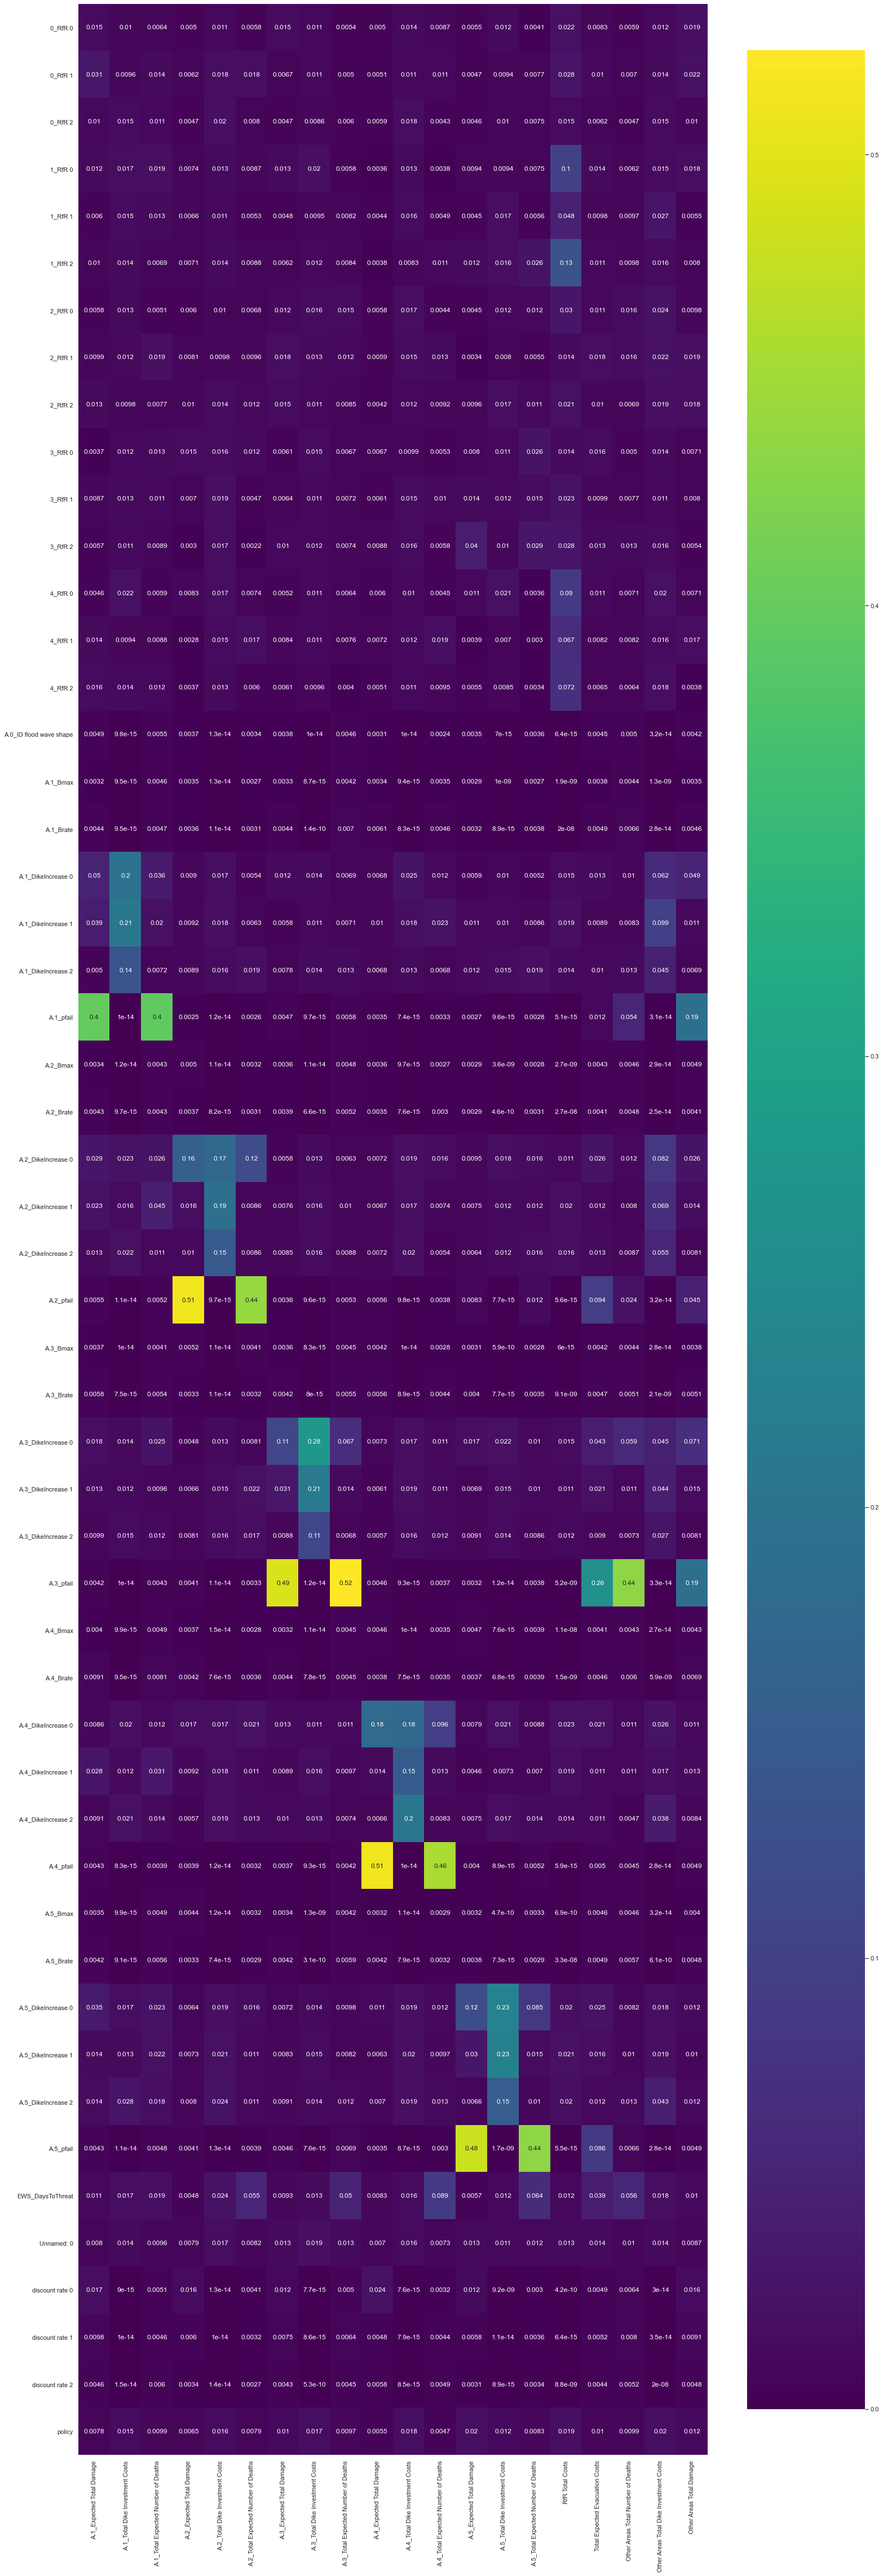

In [55]:
sns.set(rc = {'figure.figsize':(25,80)})
sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

In [107]:
x = experiments_load_DF.iloc[:,1:51]
y = outcomes_totals.iloc[:,0:51]
#y = y.to_dict()['RfR Total Costs']

In [34]:
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.analysis import feature_scoring
# extra tree feature scoring
#extra_tree = feature_scoring.get_ex_feature_scores(x, y, mode = RuleInductionType.REGRESSION, 
                                                   #nr_trees = 10)

extra_tree = feature_scoring.get_feature_scores_all(x, y,  alg='extra trees', mode = RuleInductionType.REGRESSION)


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a si

In [35]:
_0_RfR = extra_tree[0:3].sum(axis=0)
_1_RfR = extra_tree[3:6].sum(axis=0)
_2_RfR = extra_tree[6:9].sum(axis=0)
_3_RfR = extra_tree[9:12].sum(axis=0)
_4_RfR = extra_tree[12:15].sum(axis=0)

In [36]:
extra_tree_summed_rfr = extra_tree
extra_tree_summed_rfr.loc['_0_RfR'] = _0_RfR
extra_tree_summed_rfr.loc['_1_RfR'] = _1_RfR
extra_tree_summed_rfr.loc['_2_RfR'] = _2_RfR
extra_tree_summed_rfr.loc['_3_RfR'] = _3_RfR
extra_tree_summed_rfr.loc['_4_RfR'] = _4_RfR

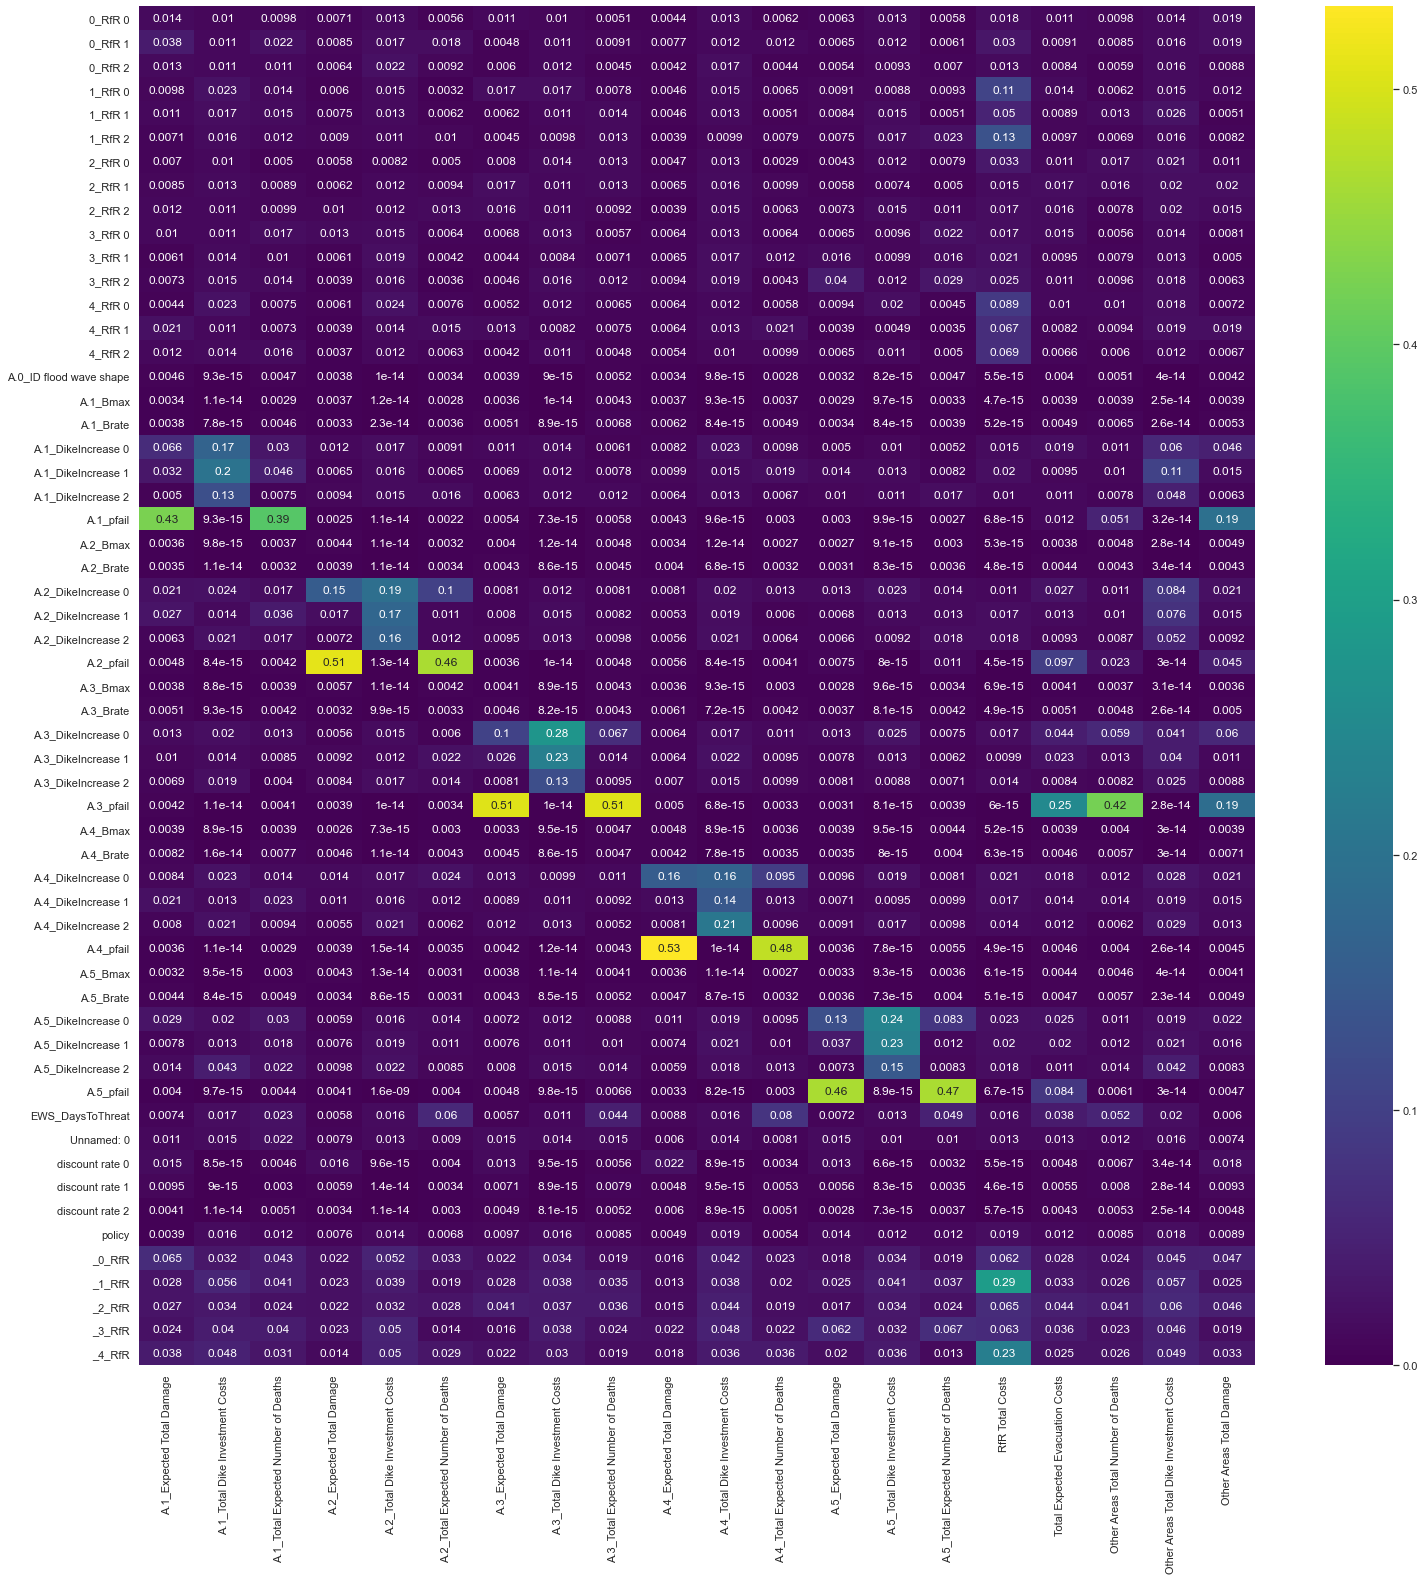

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(extra_tree_summed_rfr, cmap='viridis', annot=True)
plt.savefig('extra_trees.png')

### Trying 500p500s

In [4]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=100, policies=100)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 100 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [18]:
outcomes_DF = pd.DataFrame(outcomes)
outcomes_DF.to_csv('Outcomes_from_Exploration_500scenarios_500Policies_pf5.csv')
experiments.to_csv('Experiments_from_Exploration_500scenarios_500Policies_pf5.csv')

In [19]:
outcomes_load_DF = pd.read_csv('Outcomes_from_Exploration_500scenarios_500Policies_pf5.csv')
experiments_load_DF = pd.read_csv('Experiments_from_Exploration_500scenarios_500Policies_pf5.csv')
#adjust to the ones needed
outcomes_of_interest = outcomes_load_DF.iloc[:,::]


In [20]:
for n in range(1,6):
    outcomes_of_interest[f'A.{n}_Expected Total Damage'] = 0
    outcomes_of_interest[f'A.{n}_Total Dike Investment Costs'] = 0
    outcomes_of_interest[f'A.{n}_Total Expected Number of Deaths'] = 0
    
    for i in range(3):
        outcomes_of_interest[f'A.{n}_Expected Total Damage'] += outcomes_of_interest[f'A.{n}_Expected Annual Damage {i}']
        outcomes_of_interest[f'A.{n}_Total Dike Investment Costs'] += outcomes_of_interest[f'A.{n}_Dike Investment Costs {i}']
        outcomes_of_interest[f'A.{n}_Total Expected Number of Deaths'] += outcomes_of_interest[f'A.{n}_Expected Number of Deaths {i}']
    n+=1

outcomes_of_interest['RfR Total Costs'] = 0
outcomes_of_interest['Total Expected Evacuation Costs'] = 0
outcomes_of_interest['Other Areas Total Number of Deaths'] = 0  
outcomes_of_interest['Other Areas Total Dike Investment Costs'] = 0
outcomes_of_interest['Other Areas Total Damage'] = 0


for i in range(3):
    outcomes_of_interest['RfR Total Costs'] += outcomes_of_interest[f'RfR Total Costs {i}']
    outcomes_of_interest['Total Expected Evacuation Costs'] += outcomes_of_interest[f'Expected Evacuation Costs {i}']
    
for area in range(1,5):
    outcomes_of_interest['Other Areas Total Number of Deaths'] += outcomes_of_interest[f'A.{area}_Total Expected Number of Deaths']
    outcomes_of_interest['Other Areas Total Dike Investment Costs'] += outcomes_of_interest[f'A.{area}_Total Dike Investment Costs']
    outcomes_of_interest['Other Areas Total Damage'] += outcomes_of_interest[f'A.{area}_Expected Total Damage']
    
outcomes_totals = outcomes_of_interest.iloc[:,-20::]

In [21]:
experiments_load_DF = experiments
x = experiments_load_DF.iloc[:,1:51]
y = outcomes_totals.iloc[:,0:51]
#y = y.to_dict()['RfR Total Costs']

from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.analysis import feature_scoring
# extra tree feature scoring
#extra_tree = feature_scoring.get_ex_feature_scores(x, y, mode = RuleInductionType.REGRESSION, 
                                                   #nr_trees = 10)

extra_tree = feature_scoring.get_feature_scores_all(x, y,  alg='extra trees', mode = RuleInductionType.REGRESSION)


In [22]:
_0_RfR = extra_tree[0:3].sum(axis=0)
_1_RfR = extra_tree[3:6].sum(axis=0)
_2_RfR = extra_tree[6:9].sum(axis=0)
_3_RfR = extra_tree[9:12].sum(axis=0)
_4_RfR = extra_tree[12:15].sum(axis=0)

extra_tree_summed_rfr = extra_tree
extra_tree_summed_rfr.loc['_0_RfR'] = _0_RfR
extra_tree_summed_rfr.loc['_1_RfR'] = _1_RfR
extra_tree_summed_rfr.loc['_2_RfR'] = _2_RfR
extra_tree_summed_rfr.loc['_3_RfR'] = _3_RfR
extra_tree_summed_rfr.loc['_4_RfR'] = _4_RfR

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(extra_tree_summed_rfr, cmap='viridis', annot=True)
plt.savefig('extra_trees_l.png')

In [76]:
#400.000 runs x__x
from ema_workbench import SequentialEvaluator

ema_logging.log_to_stderr(ema_logging.INFO)

with SequentialEvaluator(dike_model) as evaluator:
    experiments_sobol, outcomes_sobol= evaluator.perform_experiments(scenarios=1000, uncertainty_sampling = 'sobol', policies=100)

[MainProcess/INFO] performing 40000 scenarios * 100 policies * 1 model(s) = 4000000 experiments


KeyboardInterrupt: 